In [3]:
import sys
sys.path.append('.conda/envs/shear/lib/python3.9/site-packages/')

import numpy as np
import astropy.io.fits as pf
from astropy.table import Table, vstack
import pylab as mplot
import yaml
import h5py
import healpy as hp
import os
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/chihway/.conda/envs/shear/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['vstack']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
bad_tile_list = np.genfromtxt('bad_tiles.txt', dtype='str')[:,1]

In [3]:
full_tile_list = np.genfromtxt('../Tilelist_DR3_1_1.csv', dtype='str', delimiter=",")[1:]

In [4]:
# number of bad tiles in the astrofix list
for tile in bad_tile_list:
    !more ../Tilelist_DR3_1_1_ASTROFIX.csv|grep {tile}

DES1027-1915, DEC_Taiga/multiepoch/delve/r6101/DES1027-1915/p01/coadd


In [5]:
astrofix_tile_list = np.genfromtxt('../Tilelist_DR3_1_1_ASTROFIX.csv', dtype='str', delimiter=",")[1:]

In [6]:
!more bad_tiles.txt

0	DES0934-0207
261	DES0908-0915
468	DES1027-1915
809	DES1014-0124
904	DES1142-1207
1567	DES1057-0958
1975	DES1003+0209
2092	DES1058-0915
2350	DES0957+0209
2444	DES1000+0209
2736	DES1120-0750
3089	DES1024-1915
3172	DES0910-0958
3184	DES0907-0958
3255	DES0911-0915
3374	DES0955-2124
3974	DES0959+0126
4032	DES1100-0958
4398	DES1021-0333
4489	DES1026-1832
4951	DES1101-0915
5024	DES1000+0252
5721	DES1117-0750


In [7]:
# tiles that failed metacal == bad tiles

In [7]:
with h5py.File('/project2/chihway/data/decade/metacal_test_20230427.hdf', 'r') as h5r:

    size = h5r['mcal_T_ratio_noshear'][:]
    s2n = h5r['mcal_s2n_noshear'][:]
    ra = h5r['ra'][:]
    dec = h5r['dec'][:]

In [17]:
RA_tile = []
DEC_tile = []
for i in range(len(bad_tile_list)):
    tile = bad_tile_list[i][3:]
    ra_hr = float(tile[:2])*15
    ra_min = float(tile[2:4])/60*15
    ra_tile = ra_hr+ra_min
    dec_sign = np.sign(float(tile[4:7]))
    dec_deg = float(tile[5:7])
    dec_arcmin = float(tile[7:9])/60
    dec_tile = dec_sign*(dec_deg+dec_arcmin)
    RA_tile.append(ra_tile)
    DEC_tile.append(dec_tile)

In [18]:
mask = (size>0.5)*(s2n>10)
ra_mask = ra[mask]
dec_mask = dec[mask]

In [19]:
nside = 1024
map_counts = np.zeros(hp.nside2npix(nside))

phi = ra_mask/180*np.pi
theta = (90.-dec_mask)/180*np.pi

pix = hp.ang2pix(nside, theta, phi)

In [20]:
for i in range(len(pix)):
    map_counts[pix[i]] += 1

In [21]:
pix_footprint = np.arange(hp.nside2npix(nside))
pix_footprint = pix_footprint[map_counts>0]

In [22]:
theta_footprint, phi_footprint = hp.pix2ang(nside, pix_footprint)
ra_footprint = phi_footprint/np.pi*180
dec_footprint = 90 - theta_footprint/np.pi*180

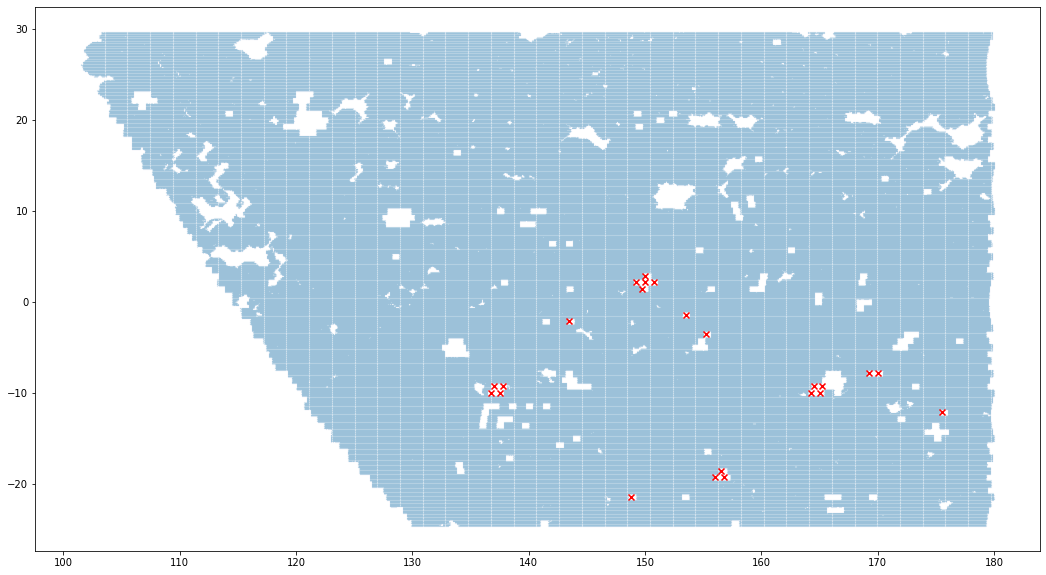

In [23]:
mplot.figure(figsize=(18,10))
mplot.scatter(ra_footprint, dec_footprint, marker='.', s=0.01)
mplot.scatter(RA_tile, DEC_tile, marker='x', c='r')

In [15]:
len(map_counts[map_counts>0]), len(ra), len(ra_mask)

(993829, 111596425, 56876460)

In [16]:
len(map_counts[map_counts>0])/len(map_counts)*np.pi*(180**2/np.pi**2)*4

3258.2592348694093

In [25]:
tilelistname_1 = '/project/chihway/chihway/shearcat/Tilelist/11072023/Tilelist_DR3_1_1_withASTROFIX.csv'
tilelistname_2 = '/project/chihway/chihway/shearcat/Tilelist/11072023/Tilelist_DR3_1_2_withASTROFIX.csv'

tilelist1 = np.genfromtxt(tilelistname_1, dtype='str', delimiter=",")[1:]
tilelist2 = np.genfromtxt(tilelistname_2, dtype='str', delimiter=",")[1:]

In [40]:
RA_good1 = []
DEC_good1 = []
RA_bad1 = []
DEC_bad1 = []

n = 0
for i in range(len(tilelist1)):
    tile = tilelist1[i][0]
    if os.path.isfile('/project/chihway/data/decade/shearcat_v2/metacal_output_'+str(tile)+'.fits'):
        RA_good1.append(float(tilelist1[i][2]))
        DEC_good1.append(float(tilelist1[i][3]))
    else:
        print(i, tile)
        RA_bad1.append(float(tilelist1[i][2]))
        DEC_bad1.append(float(tilelist1[i][3]))
        n+=1
print("total missing files", n)

52 DES1027-1915
382 DES1003+0209
516 DES1000+0252
671 DES0910-0958
684 DES1057-0958
719 DES0908-0915
730 DES1024-1915
1139 DES0934-0207
1594 DES1014-0124
1955 DES1100-0958
2181 DES0955-2124
2257 DES1000+0209
3233 DES1142-1207
3480 DES0957+0209
3619 DES1101-0915
3775 DES1026-1832
3894 DES0959+0126
4198 DES1117-0750
4227 DES1058-0915
4295 DES0907-0958
6445 DES0911-0915
6651 DES1120-0750
total missing files 22


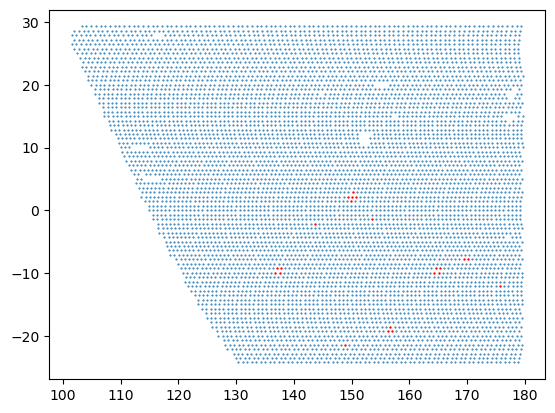

In [41]:
mplot.scatter(RA_good1, DEC_good1, marker='.', s=1)
mplot.scatter(RA_bad1, DEC_bad1, marker='.', s=2, c='r')

In [42]:
n = 0
RA_good2 = []
DEC_good2 = []
RA_bad2 = []
DEC_bad2 = []
for i in range(len(tilelist2)):
    tile = tilelist2[i][0]
    if os.path.isfile('/project/chihway/data/decade/shearcat_v3/metacal_output_'+str(tile)+'.fits'):
        RA_good2.append(float(tilelist2[i][2]))
        DEC_good2.append(float(tilelist2[i][3]))
    else:
        print(i, tile)
        n+=1
        RA_bad2.append(float(tilelist2[i][2]))
        DEC_bad2.append(float(tilelist2[i][3]))
print("total missing files", n)

90 DES1527-3123
228 DES1401-1958
245 DES1426-2458
413 DES1025-2706
470 DES1427-2541
497 DES1256-4831
754 DES1618+2543
1066 DES1330-4331
1077 DES1329-4957
1217 DES1524-3206
1597 DES1656-0624
1615 DES1636+0126
1653 DES1028-3457
1674 DES1518+2251
1820 DES1158-4914
1905 DES1338-2915
1963 DES1348-3332
2539 DES1220-0750
2589 DES1200-4957
2660 DES1720-0541
3189 DES1326-4331
3359 DES1527-3206
3413 DES1022-2706
3516 DES1359-1915
3768 DES1328-4249
3776 DES1328-4414
3890 DES1520-3206
4105 DES1322-4331
4220 DES1704-1749
4604 DES1025-2749
4642 DES1429-2458
4758 DES1745-0624
5167 DES1324-4414
5675 DES1320-4249
5702 DES1348-3249
5895 DES1335-2915
5934 DES1424-2541
6130 DES1205-4957
6252 DES1748-0624
6284 DES1022-2749
6387 DES1701-1749
6402 DES1615-3332
6413 DES1333-2958
6450 DES1241-0958
6964 DES1328-5040
6996 DES1307-2415
7047 DES1628-0416
7488 DES1219-5123
7778 DES1707-1832
8080 DES1606-2832
8137 DES1324-4249
8187 DES1622-3332
8593 DES1655-2041
8642 DES1543-2332
8913 DES1051-3706
8940 DES1251-4123


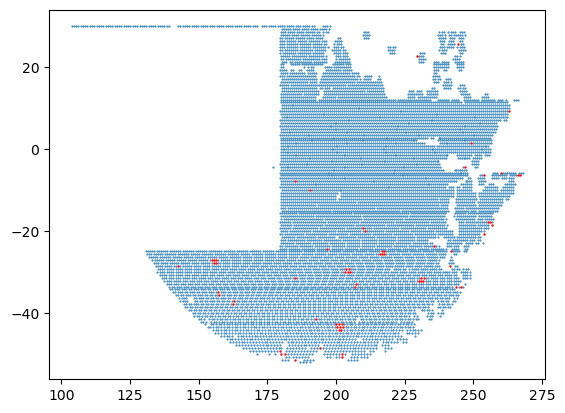

In [43]:
mplot.scatter(RA_good2, DEC_good2, marker='.', s=1)
mplot.scatter(RA_bad2, DEC_bad2, marker='.', s=2, c='r')

Text(0, 0.5, 'Dec')

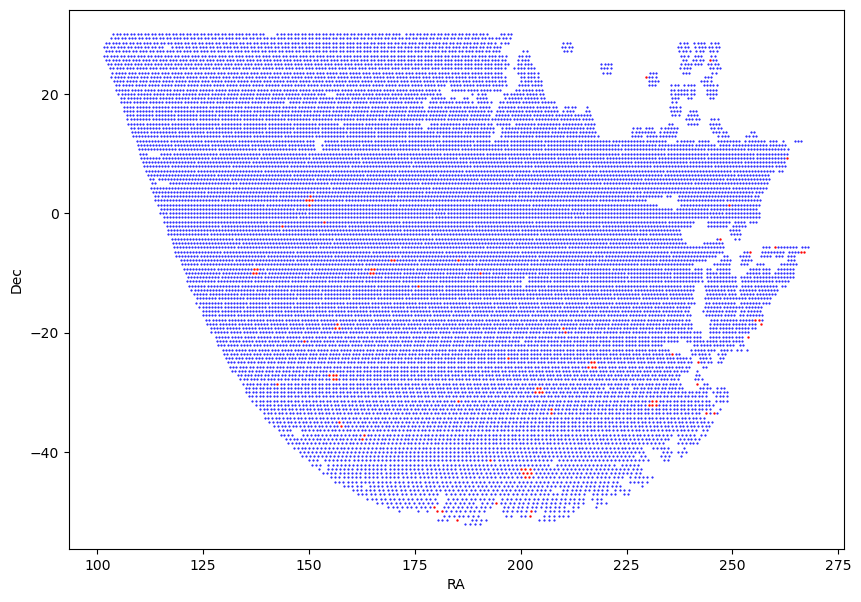

In [46]:
mplot.figure(figsize=(10,7))
mplot.scatter(RA_good1, DEC_good1, marker='.', s=1, c='b')
mplot.scatter(RA_bad1, DEC_bad1, marker='.', s=2, c='r')
mplot.scatter(RA_good2, DEC_good2, marker='.', s=1, c='b')
mplot.scatter(RA_bad2, DEC_bad2, marker='.', s=2, c='r')
mplot.xlabel('RA')
mplot.ylabel('Dec')


## Make final list

In [1]:
tilelistname_1 = '/project/chihway/chihway/shearcat/Tilelist/11072023/Tilelist_DR3_1_1_withASTROFIX.csv'
tilelistname_2 = '/project/chihway/chihway/shearcat/Tilelist/11072023/Tilelist_DR3_1_2_withASTROFIX.csv'

new_tilelistname_1 = '/project/chihway/chihway/shearcat/Tilelist/11072023/NewTiles_DR3_1_1.csv'
new_tilelistname_2 = '/project/chihway/chihway/shearcat/Tilelist/11072023/NewTiles_DR3_1_2.csv'


In [6]:
tile1 = np.genfromtxt(tilelistname_1, dtype='str', delimiter=",")[1:]
tile2 = np.genfromtxt(tilelistname_2, dtype='str', delimiter=",")[1:]
new_tile1 = np.genfromtxt(new_tilelistname_1, dtype='str', delimiter=",")[1:]
new_tile2 = np.genfromtxt(new_tilelistname_2, dtype='str', delimiter=",")[1:]

tile1_array = tile1[:,0]
tile2_array = tile2[:,0]
new_tile1_array = new_tile1[:,0]
new_tile2_array = new_tile2[:,0]


In [22]:
with open('/project/chihway/chihway/shearcat/Tilelist/11072023/new_final_list_DR3_1_1.txt', 'w') as f:
    f.write('TILENAME,PATH,RA_CENT,DEC_CENT'+'\n')
with open('/project/chihway/chihway/shearcat/Tilelist/11072023/new_final_list_DR3_1_2.txt', 'w') as f:
    f.write('TILENAME,PATH,RA_CENT,DEC_CENT'+'\n')

In [23]:
for i in range(len(tile1)):
    if tile1_array[i] in new_tile1_array:
        ids = np.where(new_tile1_array==tile1_array[i])
        string = new_tile1[ids[0][0]][0]+','+new_tile1[ids[0][0]][1]+','+new_tile1[ids[0][0]][2]+','+new_tile1[ids[0][0]][3]+'\n'
    else:
        string = tile1[i][0]+','+tile1[i][1]+','+tile1[i][2]+','+tile1[i][3]+'\n'
    with open('/project/chihway/chihway/shearcat/Tilelist/11072023/new_final_list_DR3_1_1.txt', 'a') as f:
        f.write(string)

In [24]:
for i in range(len(tile2)):
    if tile2_array[i] in new_tile2_array:
        ids = np.where(new_tile2_array==tile2_array[i])
        string = new_tile2[ids[0][0]][0]+','+new_tile2[ids[0][0]][1]+','+new_tile2[ids[0][0]][2]+','+new_tile2[ids[0][0]][3]+'\n'
    else:
        string = tile2[i][0]+','+tile2[i][1]+','+tile2[i][2]+','+tile2[i][3]+'\n'
    with open('/project/chihway/chihway/shearcat/Tilelist/11072023/new_final_list_DR3_1_2.txt', 'a') as f:
        f.write(string)

In [20]:
len(tile1_array)

6684

In [21]:
len(tile2_array)

10170

## Check missing file size

In [119]:
scratch_filelist = os.listdir('/scratch/midway3/chihway/delve_metacal1')
scratch_filelist.sort()

In [120]:
n=0
for A in scratch_filelist:
    X = os.system('ls -l /scratch/midway3/chihway/delve_metacal1/'+A+'/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r*/DES*/*/meds/*fz >temp')
    Y = np.genfromtxt('temp', dtype='str')
    if Y[:,4].astype('int').sum()/1e9>40:
        print(Y[0,8][-42:-30], A, Y[:,4].astype('int').sum()/1e9, 'G')
        n+=1
print(n)

0


In [122]:
scratch_filelist = os.listdir('/scratch/midway3/chihway/delve_metacal')
scratch_filelist.sort()

In [123]:
n = 0
for A in scratch_filelist:
#     X = os.system('ls -l /scratch/midway3/chihway/delve_metacal/'+A+'/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r*/DES*/*/meds/*fz >temp')
    Y = np.genfromtxt('/scratch/midway3/chihway/delve_metacal/'+A+'/temp', dtype='str')
    if Y[:,4].astype('int').sum()/1e9<40:
        print(Y[0,8][-42:-30], A, Y[:,4].astype('int').sum()/1e9, 'G')
        n+=1
print(n)

DES1050-3749 tile_10076 23.86443744 G
DES1329-4957 tile_1077 4.2799968 G


FileNotFoundError: /scratch/midway3/chihway/delve_metacal/tile_1139/temp not found.

In [78]:
print(Y)

[['-rw-rw-r--' '1' 'chihway' 'chihway' '11540468160' 'Aug' '29' '2022'
  '/scratch/midway3/chihway/delve_metacal/tile_3619/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r5918/DES1101-0915/p02/meds/DES1101-0915_r5918p02_g_meds-delve.fits.fz']
 ['-rw-rw-r--' '1' 'chihway' 'chihway' '13355735040' 'Aug' '29' '2022'
  '/scratch/midway3/chihway/delve_metacal/tile_3619/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r5918/DES1101-0915/p02/meds/DES1101-0915_r5918p02_i_meds-delve.fits.fz']
 ['-rw-rw-r--' '1' 'chihway' 'chihway' '11857216320' 'Aug' '29' '2022'
  '/scratch/midway3/chihway/delve_metacal/tile_3619/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r5918/DES1101-0915/p02/meds/DES1101-0915_r5918p02_r_meds-delve.fits.fz']
 ['-rw-rw-r--' '1' 'chihway' 'chihway' '12099381120' 'Aug' '29' '2022'
  '/scratch/midway3/chihway/delve_metacal/tile_3619/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r5918/DES1101-0915/p02/meds/D